# Analise dos dados da tabela

## Fazendo os imports necessários

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from database.db_connection import DatabaseConnection
from database.Repositories.AppointedHours_repository import AppointedHours_repository
from database.Repositories.ProjectPlanning_repository import ProjectPlanning_repository

<p> Transformando os registros do banco em dataFrames <p>

In [71]:
database = DatabaseConnection()
database.connect()

appointed_repository = AppointedHours_repository(database)
planning_repository = ProjectPlanning_repository(database)

appointments_df = pd.DataFrame(appointed_repository.get_all_appointed_hours())
plannings_df = pd.DataFrame(planning_repository.get_all_pplaning())

database.close()


<p> Analisando as informações dos documentos <p>

In [ ]:
columns = ['_id', 'user', 'project', 'entry_id', 'start_at', 'end_at', 'worked_hours']
columns_merge_projects_planning_resume = ['project', 'period', 'worked_hours', 'contracted_hours']

app_df = appointments_df.copy()
ppl_df = plannings_df.copy()

app_df = app_df.merge(ppl_df, how='left',left_on='project', right_on='project_id')

app_df['period'] = app_df['start_at'].dt.to_period('M')
app_df['contracted_hours'] = app_df['contracted_hours'].fillna(0)
app_df['used_hours'] = app_df['used_hours'].fillna(0)
app_df['remaining_hours'] = app_df['remaining_hours'].fillna(0)

app_df = app_df[
    (app_df['period'] >= app_df['date_start'].dt.to_period('M')) & 
    (app_df['period'] <= app_df['date_end'].dt.to_period('M'))
]

app_df = app_df[columns_merge_projects_planning_resume]

app_df['']

app_df = app_df.groupby(['project','period']).agg({
    'worked_hours': 'sum',
    'contracted_hours': 'first',
    'used_hours': 'first'
}).reset_index().sort_values(by='period',ascending=True)


app_df

,project,period,worked_hours,contracted_hours,used_hours
0,65ba6f93dc7a9a37f56fcba0,2025-02,33.26,20.0,0.0
1,66fc64d1abb3a15f1721b428,2025-02,136.44,100.0,0.0
2,670fef69d08c20561620eff9,2025-02,23.50,15.0,0.0
3,678a68d23591ef251cd44583,2025-02,27.03,10.0,0.0


<p>Analisando o schema dos dados para entender como correlacionar os dados 

C:\Users\Premiersoft\AppData\Local\Temp\ipykernel_23736\4012265203.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hours_per_day, x='date', y='worked_hours', palette='viridis')


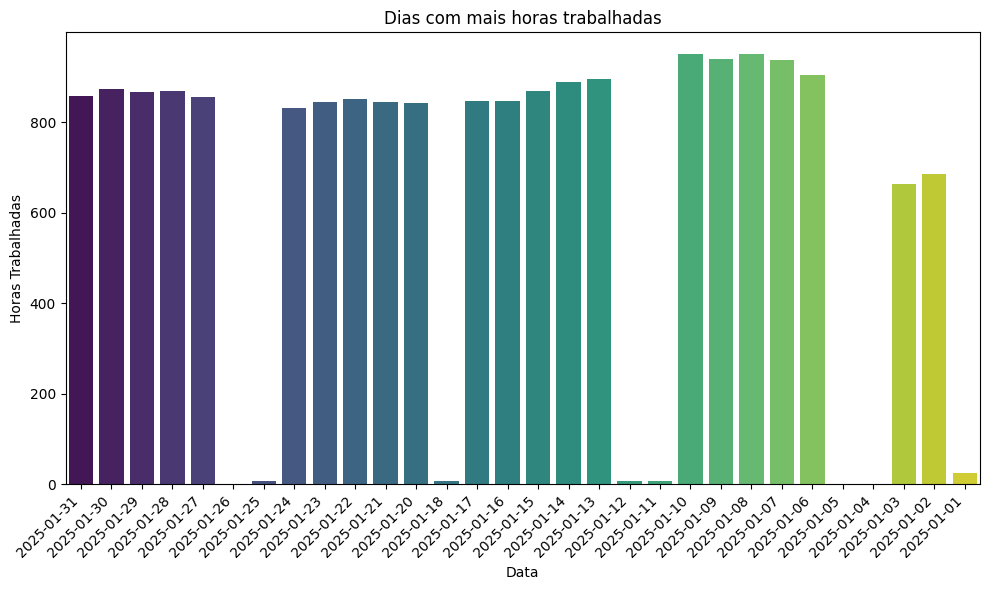

In [ ]:
appointments_df = appointments_df.loc[appointments_df['start_at'].dt.to_period('M') == '2025-01']

appointments_df['date'] = appointments_df['start_at'].dt.date

hours_per_day = appointments_df.groupby('date')['worked_hours'].sum().reset_index()
hours_per_day = hours_per_day.sort_values(by='date', ascending=False)

hours_per_day

plt.figure(figsize=(10, 6))
sns.barplot(data=hours_per_day, x='date', y='worked_hours', palette='viridis')
plt.title('Dias com mais horas trabalhadas')
plt.xlabel('Data')
plt.ylabel('Horas Trabalhadas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()